In [1]:
# specifically creating time of day segments in a separate notebook because it took 45 min to run. 
# full disclosure there was no correlation so ultimately this wasn't used but good practice
import pandas as pd
import datetime
from tqdm import tqdm_notebook

In [12]:
taxi_testm = pd.read_csv('taxi_testm.csv')

In [13]:
taxi_testm.head()

,Unnamed: 0,pickup_dt,dropoff_dt,fare_amount,tip_amount,tolls_amount,trip_time,apparentTemperature,time_of_day,weather_summary_Clear,...,payment_type_2,payment_type_3,payment_type_4,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,0,2018-10-25 10:01:35,2018-10-25 10:13:57,9.5,0.00,0.00,12.366667,40.91,NaN,1,...,1,0,0,0,0,0,1,0,0,0
1,1,2018-10-05 20:17:42,2018-10-05 20:37:16,15.5,3.36,0.00,19.566667,63.37,NaN,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2018-10-15 09:24:44,2018-10-15 09:42:57,13.5,0.00,0.00,18.216667,59.20,NaN,0,...,1,0,0,1,0,0,0,0,0,0
3,3,2018-10-25 16:10:09,2018-10-25 16:18:11,7.0,1.00,0.00,8.033333,51.01,NaN,1,...,0,0,0,0,0,0,1,0,0,0
4,4,2018-10-10 18:56:38,2018-10-10 19:51:10,52.0,12.61,5.76,54.533333,74.28,NaN,0,...,0,0,0,0,0,1,0,0,0,0


In [14]:
# converting to datetime again. Not ideal that this needs to be done everytime a csv imported
taxi_testm.info()
taxi_testm.pickup_dt = [pd.to_datetime(x) for x in taxi_testm.pickup_dt]
taxi_testm.dropoff_dt = [pd.to_datetime(x) for x in taxi_testm.dropoff_dt]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49642 entries, 0 to 49641
Data columns (total 39 columns):
Unnamed: 0                            49642 non-null int64
pickup_dt                             49642 non-null object
dropoff_dt                            49642 non-null object
fare_amount                           49642 non-null float64
tip_amount                            49642 non-null float64
tolls_amount                          49642 non-null float64
trip_time                             49642 non-null float64
apparentTemperature                   49642 non-null float64
time_of_day                           0 non-null float64
weather_summary_Clear                 49642 non-null int64
weather_summary_Heavy Rain            49642 non-null int64
weather_summary_Humid and Overcast    49642 non-null int64
weather_summary_Light Rain            49642 non-null int64
weather_summary_Mostly Cloudy         49642 non-null int64
weather_summary_Overcast              49642 non-null in

In [15]:
# initialized column already but changing values from NaNs to empty strings
taxi_testm.time_of_day = ''

In [20]:
# for loop to segment the days
for x in tqdm_notebook(range(len(taxi_testm))):
    if datetime.time(0,0,0) <= taxi_testm.dropoff_dt[x].time() <= datetime.time(3,59,59):
        taxi_testm.time_of_day[x] = 'Late Night'
    elif datetime.time(4,0,0) <= taxi_testm.dropoff_dt[x].time() <= datetime.time(7,59,59):
        taxi_testm.time_of_day[x] = 'Early Morning'
    elif datetime.time(8,0,0) <= taxi_testm.dropoff_dt[x].time() <= datetime.time(11,59,59):
        taxi_testm.time_of_day[x] = 'Morning'
    elif datetime.time(12,0,0) <= taxi_testm.dropoff_dt[x].time() <= datetime.time(15,59,59):
        taxi_testm.time_of_day[x] = 'Afternoon'
    elif datetime.time(16,0,0) <= taxi_testm.dropoff_dt[x].time() <= datetime.time(19,59,59):
        taxi_testm.time_of_day[x] = 'Evening'
    elif datetime.time(20,0,0) <= taxi_testm.dropoff_dt[x].time() <= datetime.time(23,59,59):
        taxi_testm.time_of_day[x] = 'Night'
taxi_testm.head()

C:\Users\dlm66\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\dlm66\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\dlm66\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\dlm66\Anaconda3\lib\site-packages\ipykernel_launcher.p

,Unnamed: 0,pickup_dt,dropoff_dt,fare_amount,tip_amount,tolls_amount,trip_time,apparentTemperature,time_of_day,weather_summary_Clear,...,payment_type_2,payment_type_3,payment_type_4,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,0,2018-10-25 10:01:35,2018-10-25 10:13:57,9.5,0.00,0.00,12.366667,40.91,Morning,1,...,1,0,0,0,0,0,1,0,0,0
1,1,2018-10-05 20:17:42,2018-10-05 20:37:16,15.5,3.36,0.00,19.566667,63.37,Night,0,...,0,0,0,0,0,0,0,1,0,0
2,2,2018-10-15 09:24:44,2018-10-15 09:42:57,13.5,0.00,0.00,18.216667,59.20,Morning,0,...,1,0,0,1,0,0,0,0,0,0
3,3,2018-10-25 16:10:09,2018-10-25 16:18:11,7.0,1.00,0.00,8.033333,51.01,Evening,1,...,0,0,0,0,0,0,1,0,0,0
4,4,2018-10-10 18:56:38,2018-10-10 19:51:10,52.0,12.61,5.76,54.533333,74.28,Evening,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
taxi_testm.drop('Unnamed: 0', axis=1, inplace=True)

In [24]:
# creating dummies for new day segments
time_of_day_dummies = pd.get_dummies(taxi_testm.time_of_day, prefix='time_of_day')
taxi_testm = pd.concat([taxi_testm, time_of_day_dummies], axis=1)

In [25]:
taxi_testm.head()

,pickup_dt,dropoff_dt,fare_amount,tip_amount,tolls_amount,trip_time,apparentTemperature,time_of_day,weather_summary_Clear,weather_summary_Heavy Rain,...,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,time_of_day_Afternoon,time_of_day_Early Morning,time_of_day_Evening,time_of_day_Late Night,time_of_day_Morning,time_of_day_Night
0,2018-10-25 10:01:35,2018-10-25 10:13:57,9.5,0.00,0.00,12.366667,40.91,Morning,1,0,...,1,0,0,0,0,0,0,0,1,0
1,2018-10-05 20:17:42,2018-10-05 20:37:16,15.5,3.36,0.00,19.566667,63.37,Night,0,0,...,0,1,0,0,0,0,0,0,0,1
2,2018-10-15 09:24:44,2018-10-15 09:42:57,13.5,0.00,0.00,18.216667,59.20,Morning,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2018-10-25 16:10:09,2018-10-25 16:18:11,7.0,1.00,0.00,8.033333,51.01,Evening,1,0,...,1,0,0,0,0,0,1,0,0,0
4,2018-10-10 18:56:38,2018-10-10 19:51:10,52.0,12.61,5.76,54.533333,74.28,Evening,0,0,...,0,0,0,0,0,0,1,0,0,0


In [26]:
# almost 0 correlation hooray!
taxi_testm.corr()['tip_amount']

fare_amount                           0.596066
tip_amount                            1.000000
tolls_amount                          0.470548
trip_time                             0.090498
apparentTemperature                   0.011323
weather_summary_Clear                 0.016652
weather_summary_Heavy Rain            0.000700
weather_summary_Humid and Overcast   -0.002847
weather_summary_Light Rain           -0.009950
weather_summary_Mostly Cloudy        -0.002162
weather_summary_Overcast             -0.017926
weather_summary_Partly Cloudy         0.008760
weather_summary_Rain                 -0.005015
passenger_count_1                     0.004642
passenger_count_2                    -0.000325
passenger_count_3                    -0.004007
passenger_count_4                    -0.014738
passenger_count_5                     0.004559
passenger_count_6                    -0.000838
RatecodeID_1                         -0.372569
RatecodeID_2                          0.336301
RatecodeID_3 

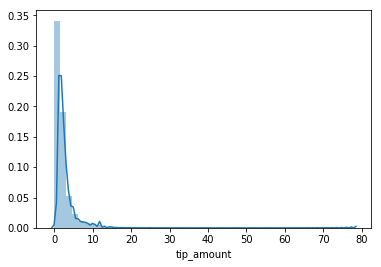

In [28]:
import seaborn as sns
sns.distplot(taxi_testm.tip_amount)